In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [6]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights =  np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                error = Y_train[i]-prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # adjustment = error * self.sigmoid_derivative(prediction) Revisar esto porque en el video lo hace así
                adjustment = error * self.sigmoid_derivative(prediction) #revisar revisar revisar
                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights += learning_rate * np.dot(inputs.T, adjustment) #Revisar en chat, no lo tengo claro basicamente tenemos que multiplicar todos los pesos
                # por el learning rate para que se modifiquen
                self.bias += learning_rate * error
 

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)


            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction =  self.predict(inputs)                
                error = Y_validation[i]-prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)


            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [7]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 4
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

X_train = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])

Y_train = np.array([0, 0, 0, 1])

train_indices = np.random.choice(N_samples, int(train_size * N_samples), replace=False)
validation_indices = np.setdiff1d(np.arange(N_samples), train_indices)

X_validation = X_train[validation_indices]
Y_validation = Y_train[validation_indices]

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])

X_data (first 5 samples):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Y_data (first 5 samples):
[0 0 0 1]


In [8]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

epoch: 0 | train error: 0.4068730893114388 | val error: 0.522761968407169
epoch: 10 | train error: 0.168967995160279 | val error: 0.16527276399999713
epoch: 20 | train error: 0.1361388623538406 | val error: 0.09259785053286607
epoch: 30 | train error: 0.12722100074357665 | val error: 0.07314975729216461
epoch: 40 | train error: 0.12057406804342204 | val error: 0.06601208062113616
epoch: 50 | train error: 0.1142802200348263 | val error: 0.06268090670053537
epoch: 60 | train error: 0.1082654185289579 | val error: 0.060652192656184906
epoch: 70 | train error: 0.1025910604015465 | val error: 0.05905811031645991
epoch: 80 | train error: 0.09728555612010381 | val error: 0.05758511753805763
epoch: 90 | train error: 0.09234757081648551 | val error: 0.05612576175895071


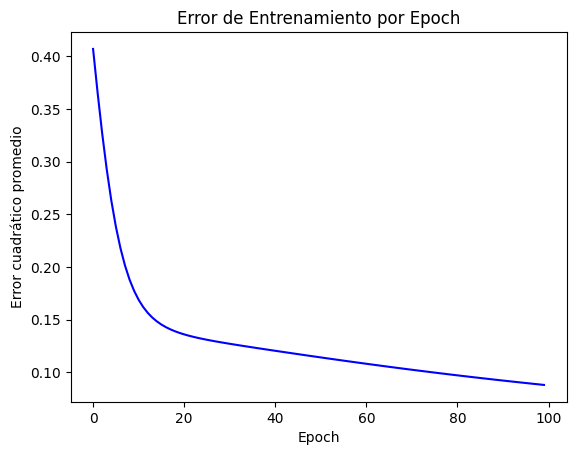

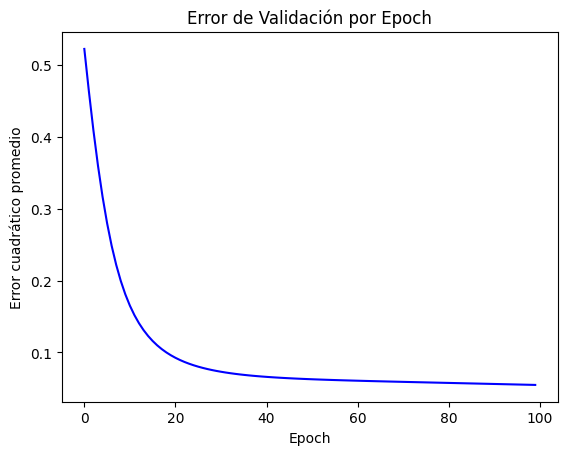

In [9]:
# Entrenar el perceptrón
# perceptron_and.train(X_train, Y_train, X_validation, Y_validation)
perceptron_and.train(X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100)

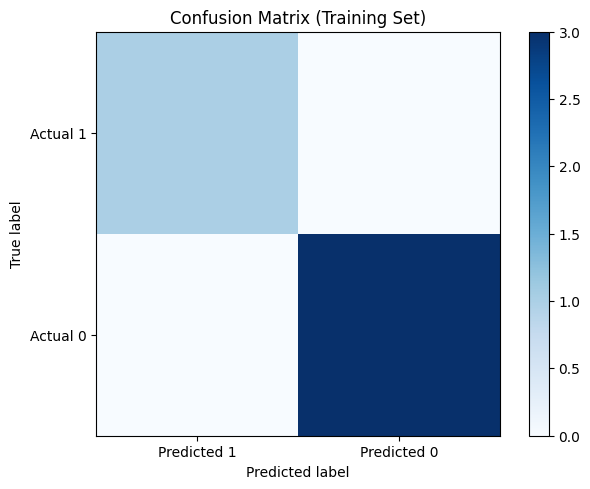

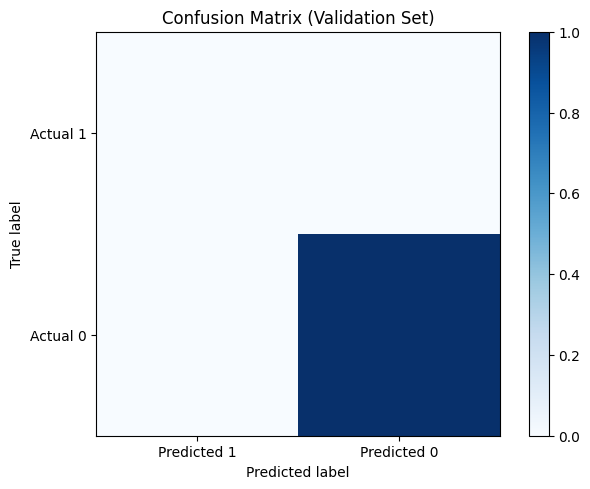

In [12]:
# Validar el modelo

# Generar las predicciones
predictions_train = []
for i in range(X_train.shape[0]):
    prediction = perceptron_and.predict(X_train[i])
    predictions_train.append(prediction)

predictions_validation = []
for i in range(X_validation.shape[0]):
    prediction = perceptron_and.predict(X_validation[i])
    predictions_validation.append(prediction)

# Calcular la matriz de confusión
def confusion_matrix(y_true, y_pred):
    TP = sum((y_true == 1) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FP = sum((y_true == 0) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

TP_train, TN_train, FP_train, FN_train = confusion_matrix(Y_train, np.round(predictions_train))
TP_validation, TN_validation, FP_validation, FN_validation = confusion_matrix(Y_validation, np.round(predictions_validation))

# Visualizar la matriz de confusión
def plot_confusion_matrix(TP, TN, FP, FN, title):
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure()
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Predicted 1', 'Predicted 0'])
    plt.yticks(tick_marks, ['Actual 1', 'Actual 0'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(TP_train, TN_train, FP_train, FN_train, title='Confusion Matrix (Training Set)')

# Matriz de confusión para el conjunto de validación
plot_confusion_matrix(TP_validation, TN_validation, FP_validation, FN_validation, title='Confusion Matrix (Validation Set)')
plt.show()
